# Embeddings

 > Disclaimer: This post has been translated to English using a machine translation model. Please, let me know if you find any mistakes.

In a previous post about [tokens](https://maximofn.com/tokens/), we already saw the minimal representation of each word, which corresponds to assigning a number to the smallest division of each word.
However, transformers and therefore LLMs do not represent word information in this way, but rather through `embeddings`.

Let's first look at two ways to represent words: `ordinal encoding` and `one hot encoding`. By examining the problems with these two types of representations, we can move on to `word embeddings` and `sentence embeddings`.

We will also see an example of how to train a `word embeddings` model with the `gensim` library.

And finally, we will see how to use pretrained `embedding` models with the `transformers` library from HuggingFace.

## Ordinal encoding

This is the most basic way to represent words within transformers. It consists of assigning a number to each word, or keeping the numbers that are already assigned to the tokens.
However, this type of representation has two problems
* Let's imagine that table corresponds to token 3, cat to token 1, and dog to token 2. One might assume that `table = cat + dog`, but this is not the case. There is no such relationship between these words. We might even think that by assigning the correct tokens, this type of relationship could be established. However, this thought falls apart with words that have more than one meaning, such as the word `bank`.
* The second problem is that neural networks internally perform many numerical calculations, so it could happen that if table has the token 3, it might internally have more importance than the word cat, which has the token 1.
So this kind of word representation can be discarded very quickly

## One hot encoding

Here we use vectors of `N` dimensions. For example, we saw that OpenAI has a vocabulary of `100277` distinct tokens. Therefore, if we use `one hot encoding`, each word would be represented by a vector of `100277` dimensions.
However, one hot encoding has two other major problems
* It does not take into account the relationship between words. Therefore, if we have two words that are synonyms, such as `gato` and `felino`, we would have two different vectors to represent them.In language, the relationship between words is very important, and not taking this relationship into account is a big problem.
* The second problem is that the vectors are very large. If we have a vocabulary of `100277` tokens, each word would be represented by a vector of `100277` dimensions. This makes the vectors very large and the calculations very expensive. Additionally, these vectors will be all zeros except for the position corresponding to the token of the word. Therefore, most of the calculations will be multiplications by zero, which are calculations that do not contribute anything. So we will have a lot of memory assigned to vectors in which only a `1` is present at a specific position.

## Word embeddings

With word embeddings, the aim is to solve the problems of the two previous types of representations. To do this, vectors of `N` dimensions are used, but in this case, vectors with 100277 dimensions are not used; instead, vectors with many fewer dimensions are used. For example, we will see that OpenAI uses `1536` dimensions.
Each of the dimensions of these vectors represents a feature of the word. For example, one of the dimensions could represent whether the word is a verb or a noun. Another dimension could represent whether the word is an animal or not. Another dimension could represent whether the word is a proper name or not. And so on.
However, these features are not defined by hand, but are learned automatically. During the training of transformers, the values of each dimension of the vectors are adjusted so that the features of each word are learned.

By making each dimension of the word vectors represent a feature of the word, it is achieved that words with similar features have similar vectors. For example, the words `gato` and `felino` will have very similar vectors, since both are animals. And the words `mesa` and `silla` will have similar vectors, as both are furniture.
In the following image we can see a 3-dimensional representation of words, and we can see that all words related to `school` are close together, all words related to `food` are close together, and all words related to `ball` are close together.
![word_embedding_3_dimmension](https://images.maximofn.com/word_embedding_3_dimmension.webp)

Having each dimension of the vectors represent a feature of the word allows us to perform operations with words. For example, if we subtract the word `man` from the word `king` and add the word `woman`, we get a word very similar to the word `queen`. We will verify this with an example later.

### Word Similarity

As each word is represented by an `N`-dimensional vector, we can calculate the similarity between two words. For this purpose, the cosine similarity function or `cosine similarity` is used.
If two words are close in the vector space, it means that the angle between their vectors is small, so their cosine is close to 1. If there is a 90-degree angle between the vectors, the cosine is 0, meaning there is no similarity between the words. And if there is a 180-degree angle between the vectors, the cosine is -1, meaning the words are opposites.
![cosine similarity](https://images.maximofn.com/cosine_similarity.webp)

### Example with OpenAI Embeddings

Now that we know what `embeddings` are, let's look at some examples with the `embeddings` provided by the `OpenAI` API.
To do this, we first need to have the `OpenAI` package installed.
```bash
pip install openai```

We import the necessary libraries

In [6]:
from openai import OpenAI
import torch
from torch.nn.functional import cosine_similarity

We use an `API key` from OpenAI. To do this, we go to the [OpenAI](https://openai.com/) page and register. Once registered, we navigate to the [API Keys](https://platform.openai.com/api-keys) section and create a new `API Key`.
![open ai api key](https://raw.githubusercontent.com/maximofn/alfred/main/gifs/openaix2.gif)

In [2]:
api_key = "Pon aquí tu API key"

We select the embedding model we want to use. In this case, we will use `text-embedding-ada-002`, which is the one recommended by `OpenAI` in their [embeddings](https://platform.openai.com/docs/guides/embeddings/) documentation.

In [100]:
model_openai = "text-embedding-ada-002"

We create an `API` client

In [100]:
client_openai = OpenAI(api_key=api_key, organization=None)

Let's see what the `embeddings` of the word `King` look like.

In [7]:
word = "Rey"
embedding_openai = torch.Tensor(client_openai.embeddings.create(input=word, model=model_openai).data[0].embedding)

embedding_openai.shape, embedding_openai

(torch.Size([1536]),
 tensor([-0.0103, -0.0005, -0.0189,  ..., -0.0009, -0.0226,  0.0045]))

As we can see, we obtain a vector of `1536` dimensions

### Example with HuggingFace embeddings

Since OpenAI's embedding generation is paid, we are going to see how to use HuggingFace embeddings, which are free. To do this, first we need to make sure the `sentence-transformers` library is installed.
```bash
pip install -U sentence-transformers```

And now we start generating the word embeddings.

First we import the library

In [1]:
from sentence_transformers import SentenceTransformer

Now we create an `embeddings` model from `HuggingFace`. We use `paraphrase-MiniLM-L6-v2` because it is a small and fast model that gives good results, and for our example, it suffices.

In [4]:
model = SentenceTransformer('paraphrase-MiniLM-L6-v2')

And now we can generate the `embeddings` of the words

In [6]:
sentence = ['Rey']
embedding_huggingface = model.encode(sentence)

embedding_huggingface.shape, embedding_huggingface[0]

((1, 384),
 array([ 4.99837071e-01, -7.60397986e-02,  5.47384083e-01,  1.89465046e-01,
        -3.21713984e-01, -1.01025246e-01,  6.44087136e-01,  4.91398573e-01,
         3.73571329e-02, -2.77234882e-01,  4.34713453e-01, -1.06284058e+00,
         2.44114518e-01,  8.98794234e-01,  4.74923879e-01, -7.48904228e-01,
         2.84665376e-01, -1.75070837e-01,  5.92192829e-01, -1.02512836e-02,
         9.45721626e-01,  2.43777707e-01,  3.91995460e-01,  3.35530996e-01,
        -4.58333105e-01,  1.18869759e-01,  5.31717360e-01, -1.21750660e-01,
        -5.45580745e-01, -7.63889611e-01, -3.19075316e-01,  2.55386919e-01,
        -4.06407446e-01, -8.99556637e-01,  6.34190366e-02, -2.96231866e-01,
        -1.22994244e-01,  7.44934231e-02, -4.49327320e-01, -2.71379113e-01,
        -3.88012260e-01, -2.82730222e-01,  2.50365853e-01,  3.06314558e-01,
         5.01561277e-02, -5.73592126e-01, -4.93096076e-02, -2.54629493e-01,
         4.45663840e-01, -1.54654181e-03,  1.85357735e-01,  2.49421135e-01,
 

As we can see, we obtain a vector of `384` dimensions. In this case, a vector of this dimension is obtained because the model `paraphrase-MiniLM-L6-v2` has been used. If we use another model, we will obtain vectors of different dimensions.

### Operations with words

Let's get the embeddings of the words `king`, `man`, `woman`, and `queen`.

In [34]:
embedding_openai_rey = torch.Tensor(client_openai.embeddings.create(input="rey", model=model_openai).data[0].embedding)
embedding_openai_hombre = torch.Tensor(client_openai.embeddings.create(input="hombre", model=model_openai).data[0].embedding)
embedding_openai_mujer = torch.Tensor(client_openai.embeddings.create(input="mujer", model=model_openai).data[0].embedding)
embedding_openai_reina = torch.Tensor(client_openai.embeddings.create(input="reina", model=model_openai).data[0].embedding)

In [35]:
embedding_openai_reina.shape, embedding_openai_reina

(torch.Size([1536]),
 tensor([-0.0110, -0.0084, -0.0115,  ...,  0.0082, -0.0096, -0.0024]))

Let's obtain the resulting embedding by subtracting the `man` embedding from the `king` embedding and adding the `woman` embedding.

In [36]:
embedding_openai = embedding_openai_rey - embedding_openai_hombre + embedding_openai_mujer

In [37]:
embedding_openai.shape, embedding_openai

(torch.Size([1536]),
 tensor([-0.0226, -0.0323,  0.0017,  ...,  0.0014, -0.0290, -0.0188]))

Finally, we compare the obtained result with the embedding of `queen`. For this, we use the `cosine_similarity` function provided by the `pytorch` library.

In [39]:
similarity_openai = cosine_similarity(embedding_openai.unsqueeze(0), embedding_openai_reina.unsqueeze(0)).item()

print(f"similarity_openai: {similarity_openai}")

similarity_openai: 0.7564167976379395


As we can see, it is a value very close to 1, so we can say that the result obtained is very similar to the embedding of `queen`

If we use English words, we get a result closer to 1

In [40]:
embedding_openai_rey = torch.Tensor(client_openai.embeddings.create(input="king", model=model_openai).data[0].embedding)
embedding_openai_hombre = torch.Tensor(client_openai.embeddings.create(input="man", model=model_openai).data[0].embedding)
embedding_openai_mujer = torch.Tensor(client_openai.embeddings.create(input="woman", model=model_openai).data[0].embedding)
embedding_openai_reina = torch.Tensor(client_openai.embeddings.create(input="queen", model=model_openai).data[0].embedding)

In [41]:
embedding_openai = embedding_openai_rey - embedding_openai_hombre + embedding_openai_mujer

In [42]:
similarity_openai = cosine_similarity(embedding_openai.unsqueeze(0), embedding_openai_reina.unsqueeze(0))
print(f"similarity_openai: {similarity_openai}")

similarity_openai: tensor([0.8849])


This is normal, since the OpenAI model has been trained with more English texts than Spanish.

### Types of Word Embeddings

There are several types of word embeddings, and each of them has its advantages and disadvantages. Let's look at the most important ones.
* Word2Vec* GloVe* FastText* BERT* GPT-2

#### Word2Vec

Word2Vec is an algorithm used to create word embeddings. This algorithm was created by Google in 2013, and it is one of the most widely used algorithms for creating word embeddings.
It has two variants, `CBOW` and `Skip-gram`. `CBOW` is faster to train, while `Skip-gram` is more accurate. Let's see how each of them works.

##### CBOW

`CBOW` or `Continuous Bag of Words` is an algorithm used to predict a word based on the words surrounding it. For example, if we have the sentence `The cat is an animal`, the algorithm will try to predict the word `cat` based on the surrounding words, in this case `The`, `is`, `an`, and `animal`.
![CBOW](https://images.maximofn.com/cbow.webp)
In this architecture, the model predicts which word is most likely in the given context. Therefore, words that have the same probability of appearing are considered similar and thus move closer together in the dimensional space.
Let's assume that in a sentence we replace `barco` with `bote`, then the model predicts the probability for both and if it turns out to be similar, we can consider the words to be similar.

##### Skip-gram

`Skip-gram` or `Skip-gram with Negative Sampling` is an algorithm used to predict the words surrounding a given word. For example, if we have the sentence `The cat is an animal`, the algorithm will try to predict the words `The`, `is`, `an`, and `animal` based on the word `cat`.
![Skip-gram](https://images.maximofn.com/Skip-gram.webp)
This architecture is similar to that of CBOW, but instead the model works in reverse. The model predicts the context using the given word. Therefore, words that have the same context are considered similar and thus move closer together in the dimensional space.

#### GloVe

`GloVe` or `Global Vectors for Word Representation` is an algorithm used to create word embeddings. This algorithm was developed by Stanford University in 2014.
Word2Vec ignores the fact that some context words occur more frequently than others and also only takes into account the local context, and therefore, does not capture the global context.
This algorithm uses a co-occurrence matrix to create the word embeddings. This co-occurrence matrix is a matrix that contains the number of times each word appears alongside each of the other words in the vocabulary.

#### FastText

`FastText` is an algorithm used to create word embeddings. This algorithm was created by Facebook in 2016.
One of the main disadvantages of `Word2Vec` and `GloVe` is that they cannot encode unknown words or out-of-vocabulary words.
So, to deal with this problem, Facebook proposed a model `FastText`. It is an extension of `Word2Vec` and follows the same `Skip-gram` and `CBOW` models. However, unlike `Word2Vec` which feeds whole words into the neural network, `FastText` first splits the words into several subwords (or `n-grams`) and then feeds them into the neural network.
For example, if the value of `n` is 3 and the word is `manzana` then its tri-gram will be [`<ma`, `man`, `anz`, `nza`, `zan`, `ana`, `na>`] and its word embedding will be the sum of the vector representation of these tri-grams. Here, the hyperparameters `min_n` and `max_n` are considered as 3 and the characters `<` and `>` represent the beginning and end of the word.
Therefore, using this methodology, unknown words can be represented in vector form, as they have a high probability that their `n-grams` are also present in other words.
This algorithm is an improvement over `Word2Vec`, as it not only takes into account the words surrounding a word, but also considers the `n-grams` of the word. For example, if we have the word `gato`, it also takes into account the `n-grams` of the word, in this case `ga`, `at`, and `to`, for `n = 2`.

#### Limitations of Word Embeddings

Word embedding techniques have yielded decent results, but the problem is that the approach is not accurate enough. They do not take into account the order in which words appear, leading to a loss of syntactic and semantic understanding of the sentence.
For example, `You go there to teach, not to play` and `You go there to play, not to teach` Both sentences will have the same representation in the vector space, but they do not mean the same thing.
Moreover, the word embedding model cannot provide satisfactory results on a large amount of text data, as the same word can have a different meaning in a different sentence depending on the context of the sentence.
For example, `I'm going to sit on the bench` and `I'm going to do some errands at the bank`. In both sentences, the word `bank` has different meanings.
Therefore, we require a type of representation that can retain the contextual meaning of the word present in a sentence.

## Sentence embeddings

The sentence embedding is similar to the word embedding, but instead of words, it encodes the entire sentence into the vector representation.
A simple way to obtain sentence embeddings is by averaging the word embeddings of all the words present in the sentence. But they are not accurate enough.
Some of the most advanced models for sentence embedding are `ELMo`, `InferSent`, and `Sentence-BERT`

### ELMo

`ELMo` or `Embeddings from Language Models` is a sentence embedding model created by the Allen University in 2018. It uses a deep bidirectional LSTM network to produce vector representations. `ELMo` can represent unknown words or out-of-vocabulary words in vector form since it is character-based.

### InferSent

`InferSent` is a sentence embedding model created by Facebook in 2017. It uses a deep bidirectional LSTM network to produce a vector representation. `InferSent` can represent unknown or out-of-vocabulary words in vector form, as it is character-based. Sentences are encoded into a 4096-dimensional vector representation.
The model training is performed on the Stanford Natural Language Inference (`SNLI`) dataset. This dataset is labeled and written by humans for around 500K sentence pairs.

### Sentence-BERT

`Sentence-BERT` is a sentence embedding model created by the University of London in 2019. It uses a deep bidirectional LSTM network to produce vector representations. `Sentence-BERT` can represent unknown or out-of-vocabulary words in vector form since it is character-based. Sentences are encoded into a 768-dimensional vector representation.
The state-of-the-art NLP model `BERT` excels in Semantic Textual Similarity tasks, but the issue is that it would take a long time for a huge corpus (65 hours for 10,000 sentences), as it requires both sentences to be fed into the network, which increases the computation by an enormous factor.
Therefore, `Sentence-BERT` is a modification of the `BERT` model.

## Training a word2vec model with gensim

To download the dataset we are going to use, you need to install the `dataset` library from huggingface:
``` bash
pip install datasets```

To train the embeddings model, we will use the `gensim` library. To install it with Conda, we use
``` bash
conda install -c conda-forge gensim```

And to install it with pip we use
``` bash
pip install gensim```

To clean the dataset we have downloaded, we are going to use regular expressions, which is usually already installed in Python, and `nltk`, which is a natural language processing library. To install it with Conda, we use
``` bash
conda install -c anaconda nltk```

And to install it with pip we use
``` bash
pip install nltk```

Now that we have everything installed, we can import the libraries we are going to use:

In [1]:
from gensim.models import Word2Vec
from gensim.parsing.preprocessing import strip_punctuation, strip_numeric, strip_short
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

### Download the dataset

We are going to download a dataset of texts from the Spanish Wikipedia. To do this, we run the following:

In [100]:
from datasets import load_dataset

dataset_corpus = load_dataset('large_spanish_corpus', name='all_wikis')

Let's see how it is

In [100]:
dataset_corpus

DatasetDict({
    train: Dataset({
        features: ['text'],
        num_rows: 28109484
    })
})

As we can see, the dataset has more than 28 million texts. Let's take a look at some of them:

In [100]:
dataset_corpus['train']['text'][0:10]

['¡Bienvenidos!',
 'Ir a los contenidos»',
 '= Contenidos =',
 '',
 'Portada',
 'Tercera Lengua más hablada en el mundo.',
 'La segunda en número de habitantes en el mundo occidental.',
 'La de mayor proyección y crecimiento día a día.',
 'El español es, hoy en día, nombrado en cada vez más contextos, tomando realce internacional como lengua de cultura y civilización siempre de mayor envergadura.',
 'Ejemplo de ello es que la comunidad minoritaria más hablada en los Estados Unidos es precisamente la que habla idioma español.']

As there are many examples, we are going to create a subset of 10 million examples to be able to work faster:

In [100]:
subset = dataset_corpus['train'].select(range(10000000))

### Cleaning the dataset

Now we download the `stopwords` from `nltk`, which are words that do not provide information and that we are going to remove from the texts.

In [100]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/wallabot/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

Now we are going to download the `punkt` from `nltk`, which is a `tokenizer` that will allow us to split the texts into sentences.

In [100]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/wallabot/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

We create a function to clean the data. This function will:
* convert the text to lowercase* Remove the URLs* Remove mentions of social media such as `@twitter` and `#hashtag`* Remove punctuation marks* Remove the numbers* Remove short words* Remove the stop words
Since we are using a huggingface dataset, the texts are in `dict` format, so we return a dictionary.

In [100]:
def clean_text(sentence_batch):
    # extrae el texto de la entrada
    text_list = sentence_batch['text']

    cleaned_text_list = []
    for text in text_list:
        # Convierte el texto a minúsculas
        text = text.lower()

        # Elimina URLs
        text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

        # Elimina las menciones @ y '#' de las redes sociales
        text = re.sub(r'\@\w+|\#\w+', '', text)

        # Elimina los caracteres de puntuación
        text = strip_punctuation(text)

        # Elimina los números
        text = strip_numeric(text)

        # Elimina las palabras cortas
        text = strip_short(text,minsize=2)

        # Elimina las palabras comunes (stop words)
        stop_words = set(stopwords.words('spanish'))
        word_tokens = word_tokenize(text)
        filtered_text = [word for word in word_tokens if word not in stop_words]

        cleaned_text_list.append(filtered_text)

    # Devuelve el texto limpio
    return {'text': cleaned_text_list}

We apply the function to the data

In [100]:
sentences_corpus = subset.map(clean_text, batched=True)

Map:   0%|          | 0/10000000 [00:00<?, ? examples/s]

Let's save the filtered dataset to a file so we don't have to run the cleaning process again.

In [100]:
sentences_corpus.save_to_disk("sentences_corpus")

Saving the dataset (0/4 shards):   0%|          | 0/15000000 [00:00<?, ? examples/s]

To load it we can do

In [2]:
from datasets import load_from_disk
sentences_corpus = load_from_disk('sentences_corpus')

Now we will have a list of lists, where each list is a tokenized sentence and without stopwords. That is, we have a list of sentences, and each sentence is a list of words. Let's see how it looks:

In [100]:
for i in range(10):
    print(f'La frase "{subset["text"][i]}" se convierte en la lista de palabras "{sentences_corpus["text"][i]}"')

La frase "¡Bienvenidos!" se convierte en la lista de palabras "['¡bienvenidos']"
La frase "Ir a los contenidos»" se convierte en la lista de palabras "['ir', 'contenidos', '»']"
La frase "= Contenidos =" se convierte en la lista de palabras "['contenidos']"
La frase "" se convierte en la lista de palabras "[]"
La frase "Portada" se convierte en la lista de palabras "['portada']"
La frase "Tercera Lengua más hablada en el mundo." se convierte en la lista de palabras "['tercera', 'lengua', 'hablada', 'mundo']"
La frase "La segunda en número de habitantes en el mundo occidental." se convierte en la lista de palabras "['segunda', 'número', 'habitantes', 'mundo', 'occidental']"
La frase "La de mayor proyección y crecimiento día a día." se convierte en la lista de palabras "['mayor', 'proyección', 'crecimiento', 'día', 'día']"
La frase "El español es, hoy en día, nombrado en cada vez más contextos, tomando realce internacional como lengua de cultura y civilización siempre de mayor envergadur

### Training the word2vec model

We are going to train an embedding model that will convert words into vectors. For this, we will use the `gensim` library and its `Word2Vec` model.

In [3]:
dataset = sentences_corpus['text']
dim_embedding = 100
window_size = 5 # 5 palabras a la izquierda y 5 palabras a la derecha
min_count = 5   # Ignora las palabras con frecuencia menor a 5
workers = 4    # Número de hilos de ejecución
sg = 1        # 0 para CBOW, 1 para Skip-gram

model = Word2Vec(dataset, vector_size=dim_embedding, window=window_size, min_count=min_count, workers=workers, sg=sg)

This model has been trained on the CPU, since `gensim` does not have an option to perform training on the GPU and even so, it took X minutes to train the model on my computer. Although the embedding dimension we chose is only 100 (as opposed to the size of OpenAI's embeddings which is 1536), this is not too long a time, given that the dataset has 10 million sentences.
Large language models are trained with datasets consisting of billions of sentences, so it's normal for training an embeddings model with a dataset of 10 million sentences to take several minutes.

Once the model is trained, we save it to a file so that we can use it in the future.

In [5]:
model.save('word2vec.model')

If we wanted to load it in the future, we could do so with

In [2]:
model = Word2Vec.load('word2vec.model')

### Evaluation of the word2vec model

Let's look at the most similar words for some words

In [7]:
model.wv.most_similar('perro', topn=10)

[('gato', 0.7948548197746277),
 ('perros', 0.77247554063797),
 ('cachorro', 0.7638891339302063),
 ('hámster', 0.7540281414985657),
 ('caniche', 0.7514827251434326),
 ('bobtail', 0.7492328882217407),
 ('mastín', 0.7491254210472107),
 ('lobo', 0.7312178611755371),
 ('semental', 0.7292628288269043),
 ('sabueso', 0.7290207147598267)]

In [8]:
model.wv.most_similar('gato', topn=10)

[('conejo', 0.8148329854011536),
 ('zorro', 0.8109457492828369),
 ('perro', 0.7948548793792725),
 ('lobo', 0.7878773808479309),
 ('ardilla', 0.7860757112503052),
 ('mapache', 0.7817519307136536),
 ('huiña', 0.766639232635498),
 ('oso', 0.7656188011169434),
 ('mono', 0.7633568644523621),
 ('camaleón', 0.7623056769371033)]

Now let's look at the example where we check the similarity of the word `queen` with the result of subtracting the word `man` from the word `king` and adding the word `woman`

In [9]:
embedding_hombre = model.wv['hombre']
embedding_mujer = model.wv['mujer']
embedding_rey = model.wv['rey']
embedding_reina = model.wv['reina']

In [10]:
embedding = embedding_rey - embedding_hombre + embedding_mujer

In [12]:
from torch.nn.functional import cosine_similarity

embedding = torch.tensor(embedding).unsqueeze(0)
embedding_reina = torch.tensor(embedding_reina).unsqueeze(0)

similarity = cosine_similarity(embedding, embedding_reina, dim=1)
similarity

tensor([0.8156])

As we can see, there is quite a bit of similarity

### Visualization of the embeddings

Let's visualize the embeddings. First, we'll obtain the vectors and words from the model.

In [3]:
embeddings = model.wv.vectors
words = list(model.wv.index_to_key)

Since the dimension of the embeddings is 100, to be able to visualize them in 2 or 3 dimensions we have to reduce the dimension. For this, we will use `PCA` (faster) or `TSNE` (more accurate) from `sklearn`

In [18]:
from sklearn.decomposition import PCA

dimmesions = 2
pca = PCA(n_components=dimmesions)
reduced_embeddings_PCA = pca.fit_transform(embeddings)

In [15]:
from sklearn.manifold import TSNE

dimmesions = 2
tsne = TSNE(n_components=dimmesions, verbose=1, perplexity=40, n_iter=300)
reduced_embeddings_tsne = tsne.fit_transform(embeddings)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 493923 samples in 0.013s...
[t-SNE] Computed neighbors for 493923 samples in 377.143s...
[t-SNE] Computed conditional probabilities for sample 1000 / 493923
[t-SNE] Computed conditional probabilities for sample 2000 / 493923
[t-SNE] Computed conditional probabilities for sample 3000 / 493923
[t-SNE] Computed conditional probabilities for sample 4000 / 493923
[t-SNE] Computed conditional probabilities for sample 5000 / 493923
[t-SNE] Computed conditional probabilities for sample 6000 / 493923
[t-SNE] Computed conditional probabilities for sample 7000 / 493923
[t-SNE] Computed conditional probabilities for sample 8000 / 493923
[t-SNE] Computed conditional probabilities for sample 9000 / 493923
[t-SNE] Computed conditional probabilities for sample 10000 / 493923
[t-SNE] Computed conditional probabilities for sample 11000 / 493923
[t-SNE] Computed conditional probabilities for sample 12000 / 493923
[t-SNE] Computed conditional prob

Now we visualize them in 2 dimensions with `matplotlib`. We are going to visualize the dimensionality reduction we have done with `PCA` and `TSNE`.

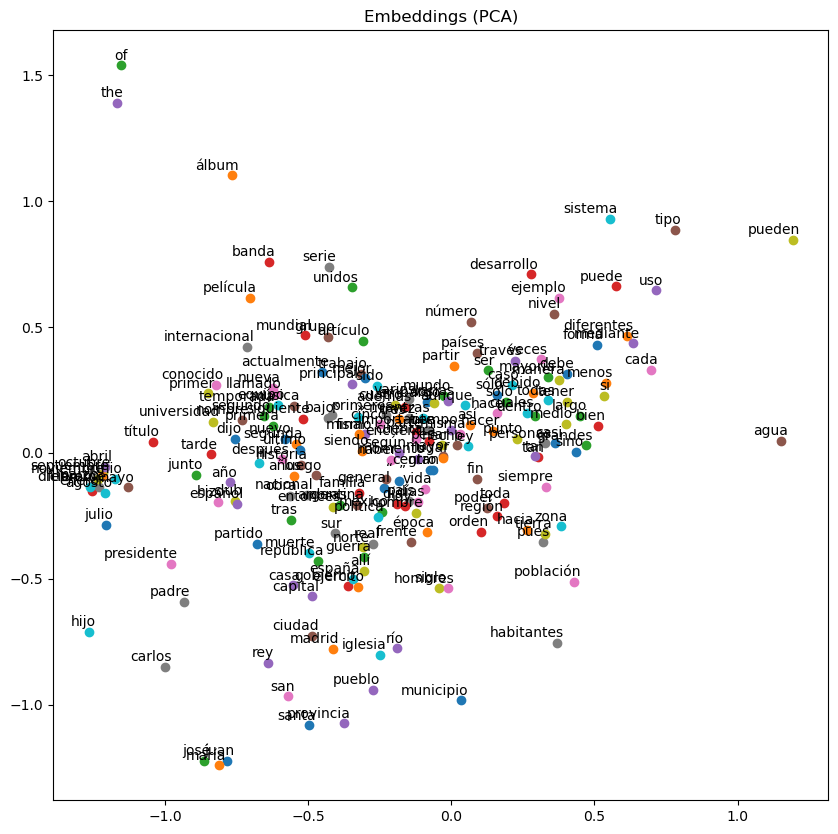

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for i, word in enumerate(words[:200]): # Limitar a las primeras 200 palabras
    plt.scatter(reduced_embeddings_PCA[i, 0], reduced_embeddings_PCA[i, 1])
    plt.annotate(word, xy=(reduced_embeddings_PCA[i, 0], reduced_embeddings_PCA[i, 1]), xytext=(5, 2), textcoords='offset points', ha='right', va='bottom')
plt.title('Embeddings (PCA)')
plt.show()

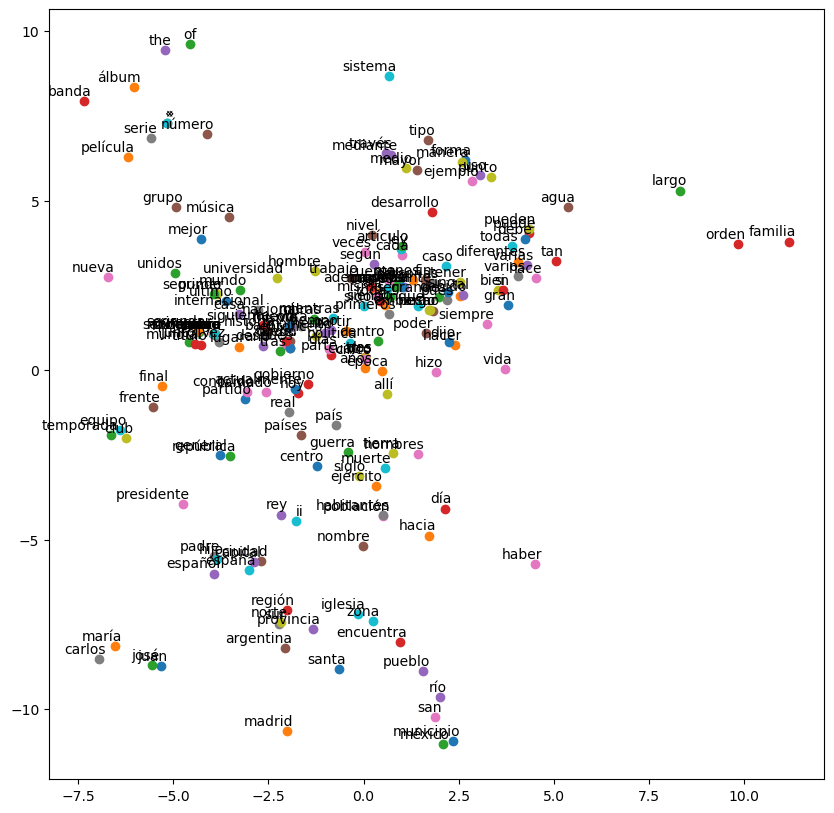

In [20]:
plt.figure(figsize=(10, 10))
for i, word in enumerate(words[:200]): # Limitar a las primeras 200 palabras
    plt.scatter(reduced_embeddings_tsne[i, 0], reduced_embeddings_tsne[i, 1])
    plt.annotate(word, xy=(reduced_embeddings_tsne[i, 0], reduced_embeddings_tsne[i, 1]), xytext=(5, 2),
                 textcoords='offset points', ha='right', va='bottom')
plt.show()

## Using Pretrained Models with HuggingFace

To use pre-trained `embedding` models, we will use the `transformers` library from `huggingface`. To install it with Conda, we use
``` bash
conda install -c conda-forge transformers```

And to install it with pip we use
``` bash
pip install transformers```

With the `feature-extraction` task from `huggingface`, we can use pretrained models to obtain word embeddings. To do this, we first import the necessary library.

In [1]:
from transformers import pipeline

We are going to obtain the `embeddings` from `BERT`

In [45]:
checkpoint = "bert-base-uncased"
feature_extractor = pipeline("feature-extraction",framework="pt",model=checkpoint)

Let's look at the `embeddings` of the word `king`

In [46]:
embedding = feature_extractor("rey", return_tensors="pt").squeeze(0)
embedding.shape

torch.Size([3, 768])

As we can see, we obtain a vector of `768` dimensions, that is, the `embeddings` of `BERT` have `768` dimensions. On the other hand, we see that it has 3 `embedding` vectors, this is because `BERT` adds a token at the beginning and another at the end of the sentence, so we are only interested in the middle vector.

Let's redo the example where we check the similarity of the word `queen` with the result of subtracting the word `man` from the word `king` and adding the word `woman`

In [58]:
embedding_hombre = feature_extractor("man", return_tensors="pt").squeeze(0)[1]
embedding_mujer = feature_extractor("woman", return_tensors="pt").squeeze(0)[1]
embedding_rey = feature_extractor("king", return_tensors="pt").squeeze(0)[1]
embedding_reina = feature_extractor("queen", return_tensors="pt").squeeze(0)[1]

In [59]:
embedding = embedding_rey - embedding_hombre + embedding_mujer

Let's see the similarity

In [60]:
import torch
from torch.nn.functional import cosine_similarity

embedding = torch.tensor(embedding).unsqueeze(0)
embedding_reina = torch.tensor(embedding_reina).unsqueeze(0)

similarity = cosine_similarity(embedding, embedding_reina, dim=1)
similarity.item()

/tmp/ipykernel_33343/4248442045.py:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  embedding = torch.tensor(embedding).unsqueeze(0)
/tmp/ipykernel_33343/4248442045.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  embedding_reina = torch.tensor(embedding_reina).unsqueeze(0)


0.742547333240509

Using the `embeddings` of `BERT` also yields a result very close to 1